In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import thejoker
import scipy.stats
import GP_class
import george
import numpy.random as rnd

In [2]:
def read_data(filename, whitespace=False, datadir="./"):
    """
    Read in light curve data from asteroid.
    """

    data  = pd.read_csv(datadir+filename, header=None, delim_whitespace=whitespace)

    tsample = data[0]
    fsample = data[1]
    flux_err = data[2]

    return tsample, fsample, flux_err

time, flux, flux_err = read_data("../data/simulation_results_new/3200/3200_lc_49627_to_49787.txt_sampled_talc_14days.txt")

In [3]:
# 1 : set up the prior distriubtion

prior = scipy.stats.norm(np.log(4./24.), (12./24.))

In [144]:
# sample the prior pdf with 100 rvs
nsamples = 1000000
J = prior.rvs(nsamples)

In [145]:
mean_flux = np.mean(flux)
log_amp = np.log(flux.max()-flux.min())
gamma = 1
log_period = 0

params = [mean_flux, log_amp, gamma, log_period]

In [146]:
kernel = np.exp(log_amp) * george.kernels.ExpSine2Kernel(gamma = gamma, log_period = log_period)
gp = george.GP(kernel, fit_mean=True, mean=mean_flux)
gp.compute(time, flux_err)

In [147]:
# 2: for each j, calculate the log likelihood

L_results = np.ones(nsamples)

for i in np.arange(nsamples):
    
    params = [mean_flux, log_amp, gamma, J[i]]
    
    gp.set_parameter_vector(params)

    try:
        gp.compute(time, flux_err)
        lnlike = gp.log_likelihood(flux)
    except np.linalg.LinAlgError:
        lnlike = -1e25
        
    L_results[i] = lnlike

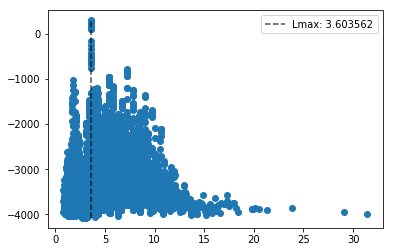

In [106]:
plt.scatter(np.exp(J)*24., L_results)

# plot l_max
L_max_period = np.exp(J[np.where(L_results==L_results.max())])*24.
plt.vlines(L_max_period, L_results.min(), L_results.max(), label="Lmax: %f" %L_max_period, linestyles='dashed', alpha=0.7)
plt.legend()

In [148]:
np.where(L_results>=0)

(array([   517,    987,   1042,   1193,   1471,   3439,   4840,   4890,
          6563,   7077,   8131,  11230,  12623,  14638,  16426,  17255,
         17687,  17765,  17786,  18725,  18871,  19232,  21317,  25463,
         25484,  26270,  26521,  27532,  28535,  28946,  31188,  31391,
         31530,  33308,  34840,  34900,  35551,  37992,  41135,  41545,
         41913,  43145,  43297,  44498,  46835,  48496,  49622,  50319,
         52386,  52426,  52530,  54629,  55365,  56769,  57379,  57669,
         58368,  59117,  59224,  60132,  60768,  62544,  69192,  70422,
         70792,  71122,  72285,  73352,  75132,  75815,  76539,  77462,
         77557,  78703,  79297,  80224,  81356,  81968,  82010,  82238,
         82743,  82948,  85088,  85641,  86943,  87013,  87768,  88088,
         89418,  89562,  90782,  90797,  91363,  91695,  91794,  93069,
         93817,  94858,  96484,  97688,  98502, 100473, 101289, 104064,
        105162, 106302, 108480, 111480, 112046, 112758, 114119, 

In [107]:
# 3 : Pick a random number r out of a uniform distribution between 0 and Lmax
uu = rnd.uniform(size=len(L_results))

good_samples_bool = uu < np.exp(L_results-L_results.max())
good_samples_idx, = np.where(good_samples_bool)

array([2.79730808e+129])

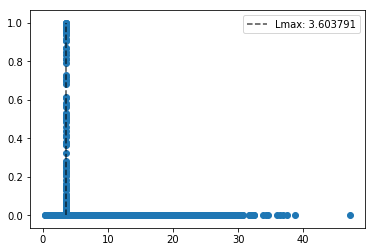

In [151]:
plt.scatter(np.exp(J)*24., np.exp(L_results-L_results.max()))

# plot l_max
L_max_period = np.exp(J[np.where(L_results==L_results.max())])*24.
plt.vlines(L_max_period, 0, 1, label="Lmax: %f" %L_max_period, linestyles='dashed', alpha=0.7)
plt.legend()

In [152]:
len(good_samples_idx)

45